<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

**Serie de tiempo: KMS**


Importamos módulos a utilizar

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [164]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Kilometros_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_km=raw_csv_data.copy()

#### Breve resumen del dataset


In [165]:
print(df_km.columns)

Index(['Fecha', 'KM'], dtype='object')


In [166]:
df_km.describe(include='all')

,Fecha,KM
count,761,761.000000
unique,761,NaN
top,2023-03-18,NaN
freq,1,NaN
mean,NaN,73506.130891
std,NaN,23975.028897
min,NaN,18.976000
25%,NaN,52063.096000
50%,NaN,75190.790000
75%,NaN,96904.004000


In [167]:
df_km.head(10)

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717
5,2023-05-11,104149.399
6,2023-03-21,102278.464
7,2023-04-24,103627.203
8,2023-04-18,103366.435
9,2023-05-31,103403.519


In [168]:
df_km.tail(10)

,Fecha,KM
751,2022-04-09,48305.086
752,2022-01-29,47482.883
753,2023-07-23,45117.943
754,2022-01-11,50103.326
755,2022-12-18,17554.422
756,2022-04-26,23536.646
757,2023-06-13,47.508
758,2022-10-12,49.673
759,2022-05-17,54.524
760,2022-10-13,18.976


Adaptamos el dataset para trabajarlo segun sus series temporales

In [169]:
df_km.Fecha = pd.to_datetime(df_km.Fecha, dayfirst = True)

In [170]:
df_km.Fecha.describe()

count                              761
mean     2022-10-15 04:07:53.061760768
min                2021-09-30 00:00:00
25%                2022-04-08 00:00:00
50%                2022-10-15 00:00:00
75%                2023-04-23 00:00:00
max                2023-10-31 00:00:00
Name: Fecha, dtype: object

Aplicamos filtro de 2 años de duración al campo Fecha (2021-10-01-2023-10-31)

In [171]:
df_km = df_km[(df_km['Fecha'] >= '2021-10-01') & (df_km['Fecha'] <= '2023-10-31')]
df_km = df_km.sort_values(by=['Fecha'], ascending=True)
df_km = df_km.reset_index(drop=True)

In [172]:
df_km.head(10)

,Fecha,KM
0,2021-10-01,73177.190
1,2021-10-02,49300.256
2,2021-10-03,34024.972
3,2021-10-04,73453.515
4,2021-10-05,73722.635
5,2021-10-06,73465.563
6,2021-10-07,49462.478
7,2021-10-08,35282.426
8,2021-10-09,48384.782
9,2021-10-10,34785.451


In [173]:
df_km.tail(10)

,Fecha,KM
750,2023-10-22,47321.881
751,2023-10-23,101572.556
752,2023-10-24,101884.237
753,2023-10-25,102691.406
754,2023-10-26,102253.728
755,2023-10-27,102590.551
756,2023-10-28,62622.827
757,2023-10-29,44060.420
758,2023-10-30,101843.308
759,2023-10-31,102381.640


Analisis de fechas duplicadas

In [174]:
# Detectar valores duplicados en la columna 'fecha'
fechas_duplicadas = df_km[df_km.duplicated(subset=['Fecha'])]

In [175]:
fechas_duplicadas

,Fecha,KM


In [176]:
from skimpy import skim

In [177]:
skim(df_km)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 760    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ KM              │   0 │      0 │   74000 │   24000 │  19 │   52000 │   75000 │   97000 │  110000 │  ▁▅▃▅▇  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Seteamos como index del dataset segun el dia

In [178]:
df_km.set_index("Fecha",inplace=True)

In [179]:
df_km.head()

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635


#### Adaptamos el datset a la frecuencia diaria

In [180]:
df_km=df_km.asfreq('d')
df_km

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635
...,...
2023-10-27,102590.551
2023-10-28,62622.827
2023-10-29,44060.420


Verificamos existencia de fechas nulas

In [181]:
df_km.isna().sum()

KM    1
dtype: int64

Obtenemos posición del registro con kms nulos

In [182]:
fila_con_na = df_km[df_km.KM.isna()].reset_index().Fecha

In [183]:
fila_con_na

0   2023-06-22
Name: Fecha, dtype: datetime64[ns]

In [184]:
from datetime import timedelta

Este día no aparece con km en el dataset, le imputamos el valor promedio del dia de la semana anterior y posterior

In [185]:
df_km.loc[fila_con_na[0], "KM"] = (df_km.loc[fila_con_na[0] + timedelta(days=-7), "KM"] + df_km.loc[fila_con_na[0] + timedelta(days=7), "KM"])/2

Volvemos a verificar existencia de valores nulos

In [151]:
df_km.isna().sum()

KM    0
dtype: int64

Verificamos existencia de aquellos valores que sean muy bajos (menores a 30.000 km)

In [192]:
df_bajos= df_km[df_km['KM'] < 30000].reset_index().Fecha
df_bajos

0   2022-01-01
1   2022-01-09
2   2022-04-26
3   2022-05-17
4   2022-10-12
5   2022-10-13
6   2022-12-18
7   2023-06-13
Name: Fecha, dtype: datetime64[ns]

Estos días hubo paro de transporte, lo que estaría explicando la cantidad escasa de kms recorridos por las unidades (posible vuelta al punto de línea o llevarlos a los talleres, por ej.)

Entonces se aplica mismo criterio de promediar con los km del mismo día de la semana anterior y posterior.

In [193]:
for i in df_bajos:
  df_km.loc[i, "KM"] = (df_km.loc[i + timedelta(days=-7), "KM"] + df_km.loc[i + timedelta(days=7), "KM"])/2

## Punto 2

Visualizamos el dataset teniendo en cuenta la serie temporal

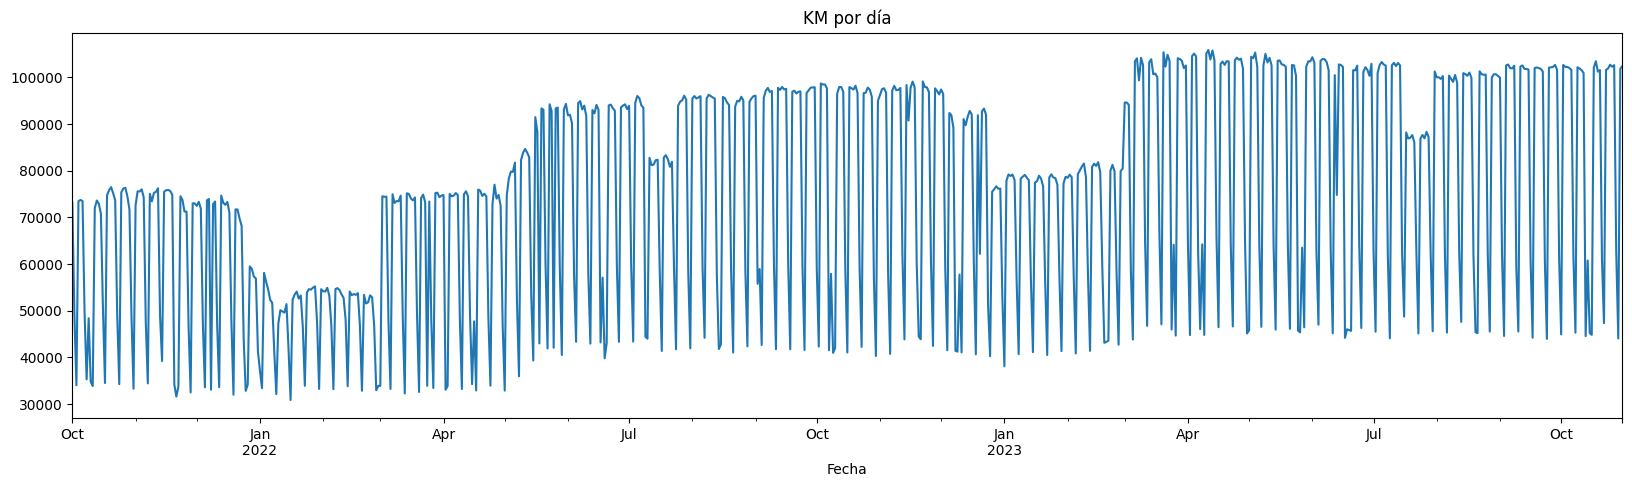

In [194]:
df_km.KM.plot(figsize=(20,5), title = "KM por día")
plt.show()

<Axes: ylabel='KM'>

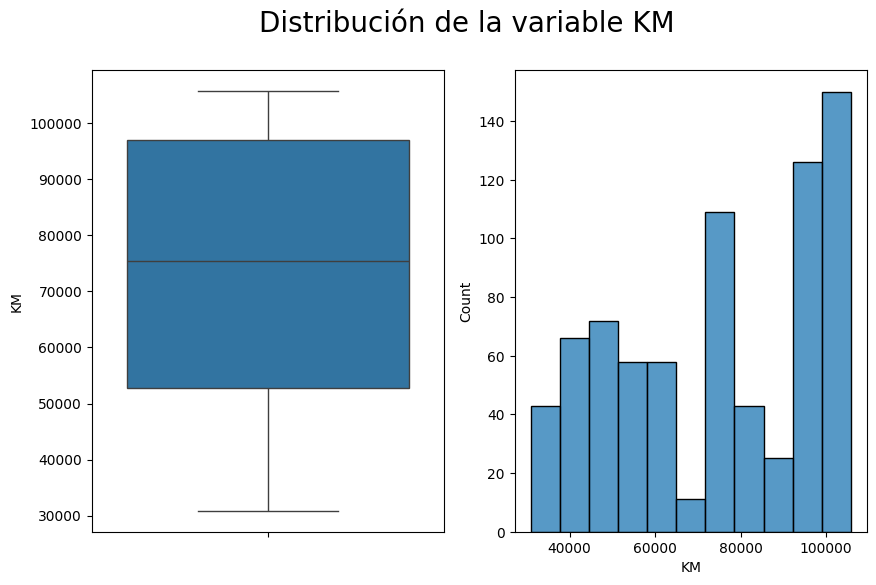

In [195]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable KM', fontsize = 20)


sns.histplot(data = df_km, x="KM", ax = axs[1])
sns.boxplot(y = "KM", data = df_km, ax = axs[0])


La variable parece no seguir una distribución en particular, los kms recorridos por día se encuentran entre 50.000 y 100.000,
siendo este último valor el más frecuente.

### Descomposición de Series Temporales

In [196]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

### Descomposicion Aditiva

In [200]:
df_km = df_km.asfreq('d')

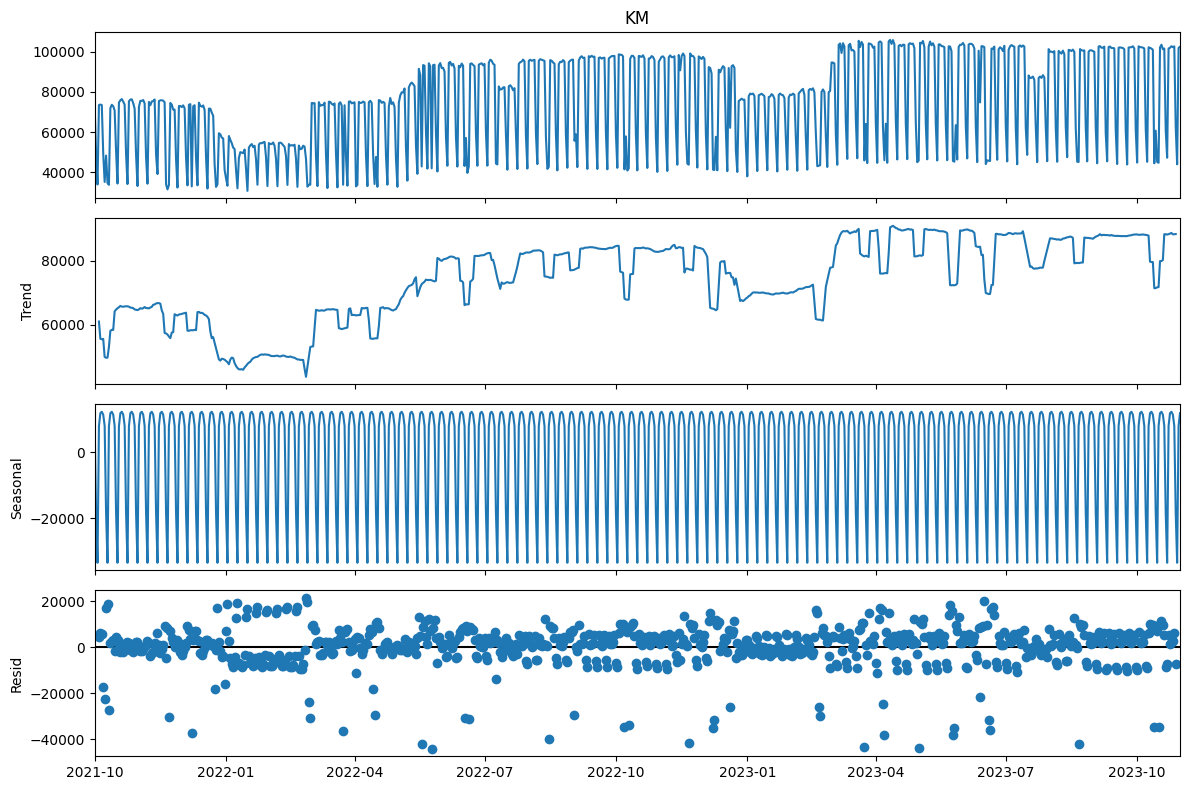

In [201]:
s_dec_additive = seasonal_decompose(df_km.KM, model = "adittive")
plt.rcParams['figure.figsize']=[12.0,8.0]
s_dec_additive.plot()
plt.show()

Al hacer la descomposición de la serie se pueden observar 4 características:
- El ciclo
- La tendencia   
- La estacionalidad.
- Movimientos irregulares ( el error )

In [199]:
s_dec_additive.resid.describe()

count      755.000000
mean        -1.932399
std       9657.372492
min     -44186.242897
25%      -3264.054709
50%       1479.511246
75%       4975.295621
max      21493.939940
Name: resid, dtype: float64

## Distribución de residuos de la descomposición aditiva

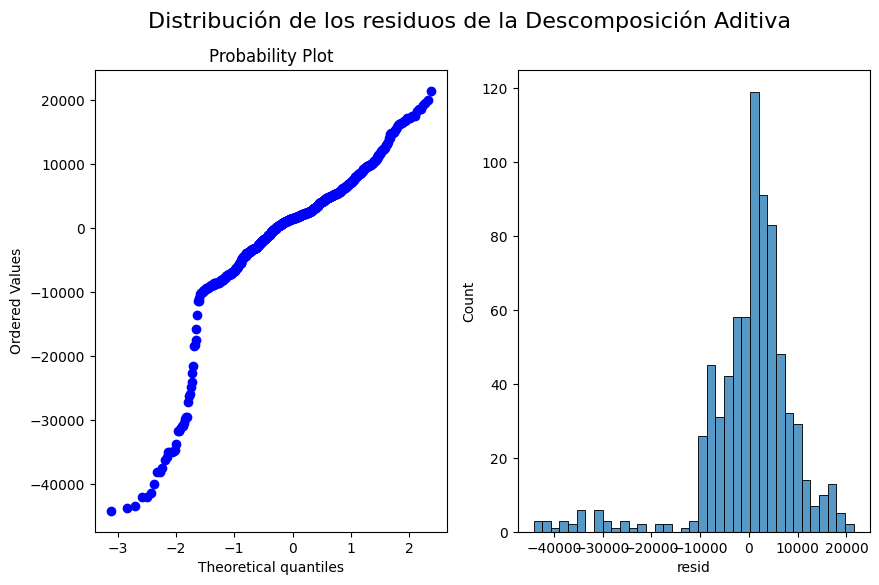

In [202]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Descomposición Aditiva", size = 16)

probplot(s_dec_additive.resid, plot=axs[0], fit=True, dist='norm');

df = pd.DataFrame({
    'observed': s_dec_additive.observed,
    'trend': s_dec_additive.trend,
    'seasonal': s_dec_additive.seasonal,
    'resid': s_dec_additive.resid
})

sns.histplot(data = df, x='resid', ax = axs[1]);

En base a los gráficos podemos deducir que los residuos de la descomposición aditiva no se distribuyen normalmente.

### Descomposicion Multiplicativa

In [203]:
plt.rcParams['figure.figsize']=[12.0,8.0]

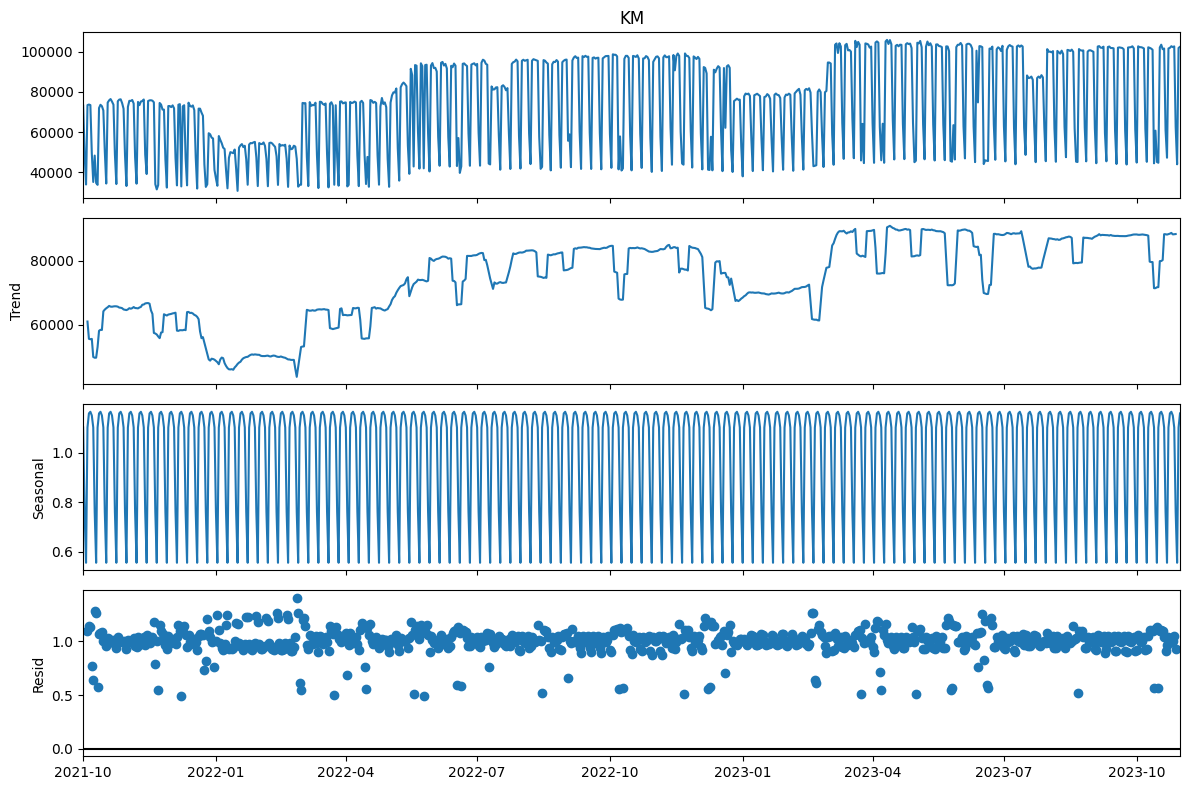

In [204]:
s_dec_multiplicative = seasonal_decompose(df_km.KM, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

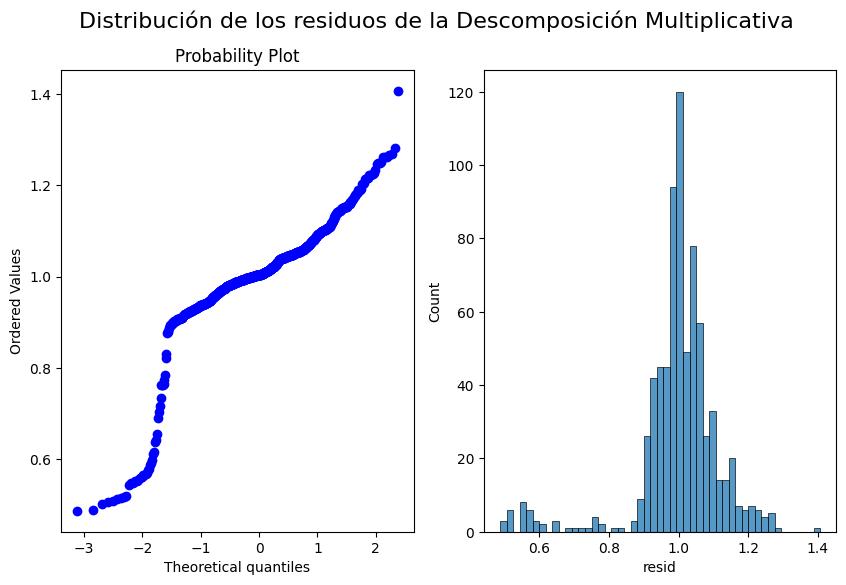

In [205]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Descomposición Multiplicativa", size = 16)

probplot(s_dec_multiplicative.resid, plot=axs[0], fit=True, dist='norm');

df = pd.DataFrame({
    'observed': s_dec_multiplicative.observed,
    'trend': s_dec_multiplicative.trend,
    'seasonal': s_dec_multiplicative.seasonal,
    'resid': s_dec_multiplicative.resid
})

sns.histplot(data = df, x='resid', ax = axs[1]);

Analizando el QQplot de la diferenciacion multiplicativa es notorio un peor resultado dado a que la serie inicial presenta una apariencia lineal y es mejor aplicar en dicho caso diferenciación aditiva.

### Representación gráfica de la Función de Autocorrelación

In [206]:
# Módulos a utilizar
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [207]:
plt.rcParams['figure.figsize']=[6.0,4.0]

#### Grafico ACF de los KM

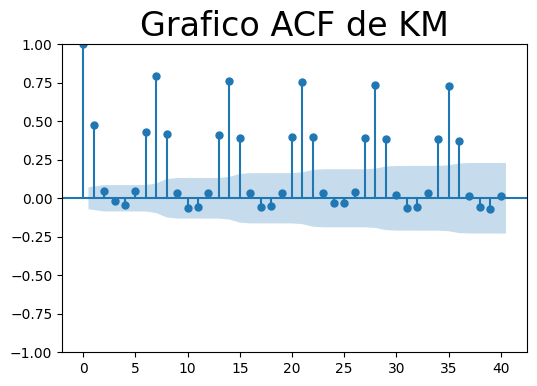

In [208]:
plot_acf(df_km.KM,lags=40)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Observaciones

El grafico de autocorrelación nos muestra claramente una estacionalidad y por lo tanto una primera aproximación de no estacionariedad dado a que se presentan muchos valores por fuera del intervalo de confianza. Tampoco no se alcanza a percibir un decrecimiento lineal con tendencia a bajar en el tiempo.
Por lo tanto se necesita aplicar un metodo de transformación para conseguir la misma.

### Transformaciones

Ahora vamos a calcular cuantas transformaciones se necesitan.

In [209]:
print(pm.arima.ndiffs(df_km.KM))

1


Aplicamos transformación de la serie para lograr estacionariedad (periodo semanal)

In [210]:
# Diferencia de la serie con periodo 7 dado a que los datos presentan una estacionalidad semanal
km_diff_7= df_km.copy()
km_diff_7=km_diff_7.diff(axis = 0, periods = 7)
km_diff_7.dropna(inplace = True)

In [211]:
km_diff_7.head(10)

,KM
Fecha,
2021-10-08,-37894.764
2021-10-09,-915.474
2021-10-10,760.479
2021-10-11,-39601.280
2021-10-12,-1722.518
2021-10-13,134.040
2021-10-14,23430.614
2021-10-15,35496.793
2021-10-16,2144.720


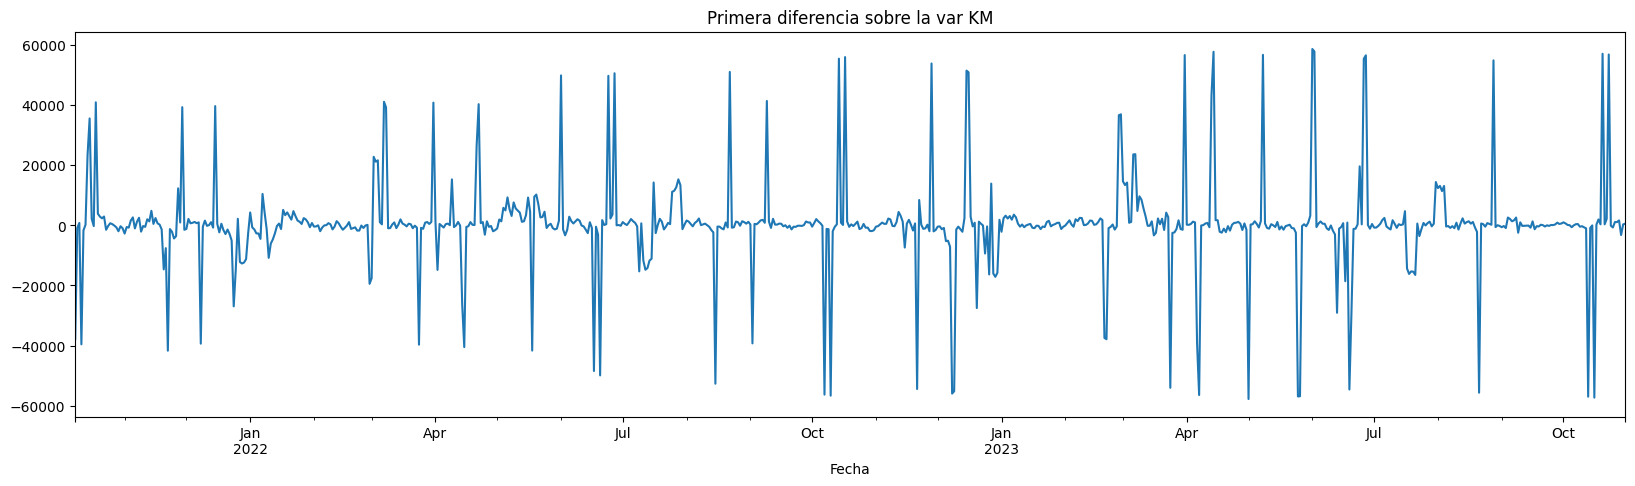

In [212]:
#grafico de la serie diferenciada para la var KM
km_diff_7.KM.plot(figsize=(20,5), title = "Primera diferencia sobre la var KM")
plt.show()

Observaciones

La grafica de la primera diferencia de la serie original muestra característica de Ruido blanco que son;
la reversión a la media con un valor constante esperado igual a cero y volatilidad constante en el tiempo.

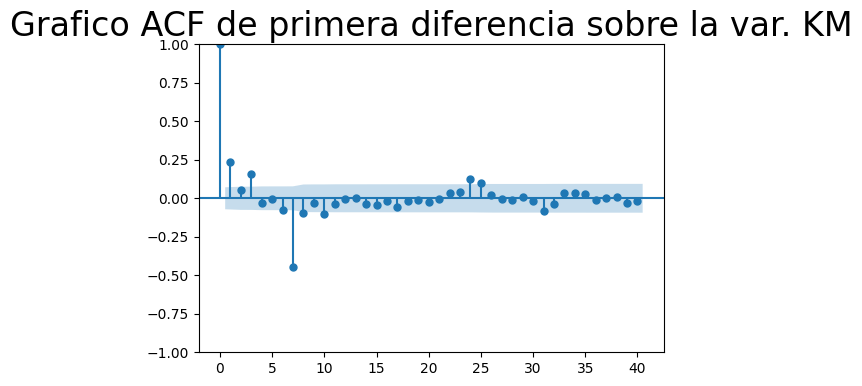

In [213]:
plot_acf(km_diff_7.KM,lags=40)
plt.title("Grafico ACF de primera diferencia sobre la var. KM", size= 24)
plt.show()

Observación

Vemos en la función de autocorrelación de la primera diferencia de la serie original un cambio muy marcado dado a que se percibe como desaparece le patron estacional respecto a la grafica de ACF de la serie original.

#### Ruido Blanco

In [214]:
wn = np.random.normal(loc = df_km.KM.mean(), scale = df_km.KM.std(), size = len(df_km))
df_km['wn'] = wn
df_km.describe()

,KM,wn
count,761.000000,761.000000
mean,74130.107441,75037.242738
std,23275.130527,23429.638056
min,30860.064000,11738.444303
25%,52849.110000,58865.372665
50%,75470.111000,74269.200542
75%,97054.178000,90765.831766
max,105834.661000,146390.335510


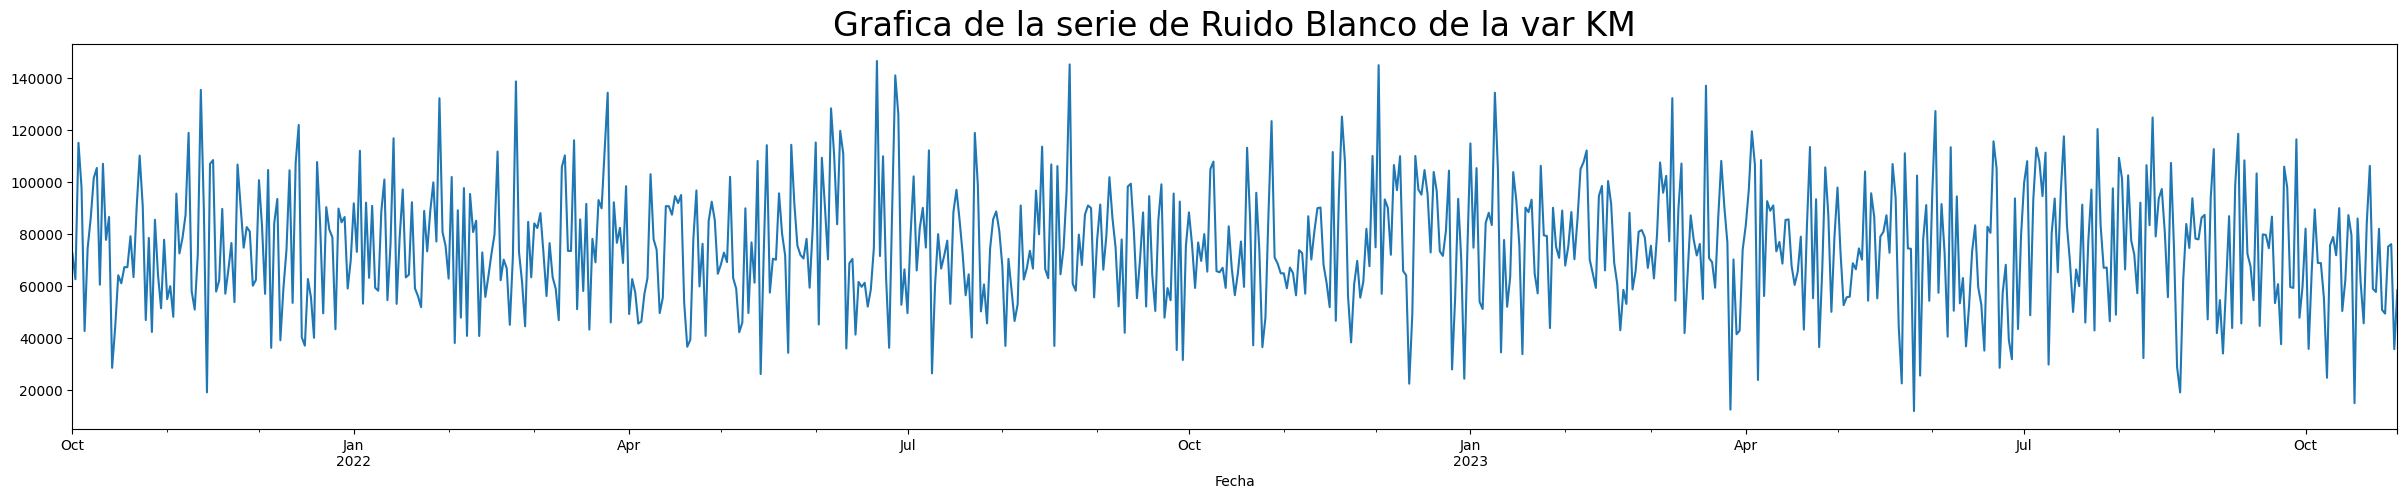

In [215]:
df_km.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco de la var KM", size= 24)
plt.show()

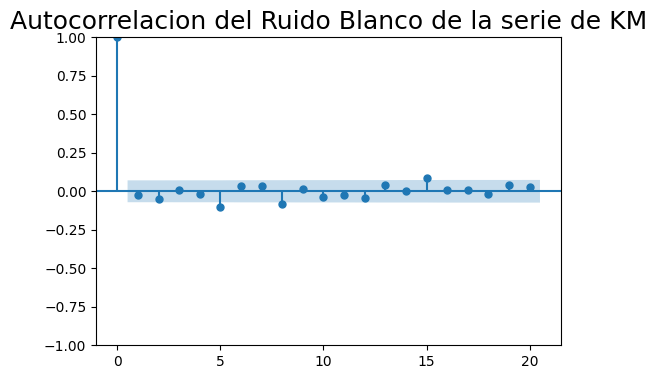

In [216]:
plot_acf(df_km.wn, lags=20)
plt.title("Autocorrelacion del Ruido Blanco de la serie de KM", size= 18)
plt.show()

## Punto 3
Graficas de FAS, FAC y FACP

In [217]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as tsa

In [218]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM diferenciado')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

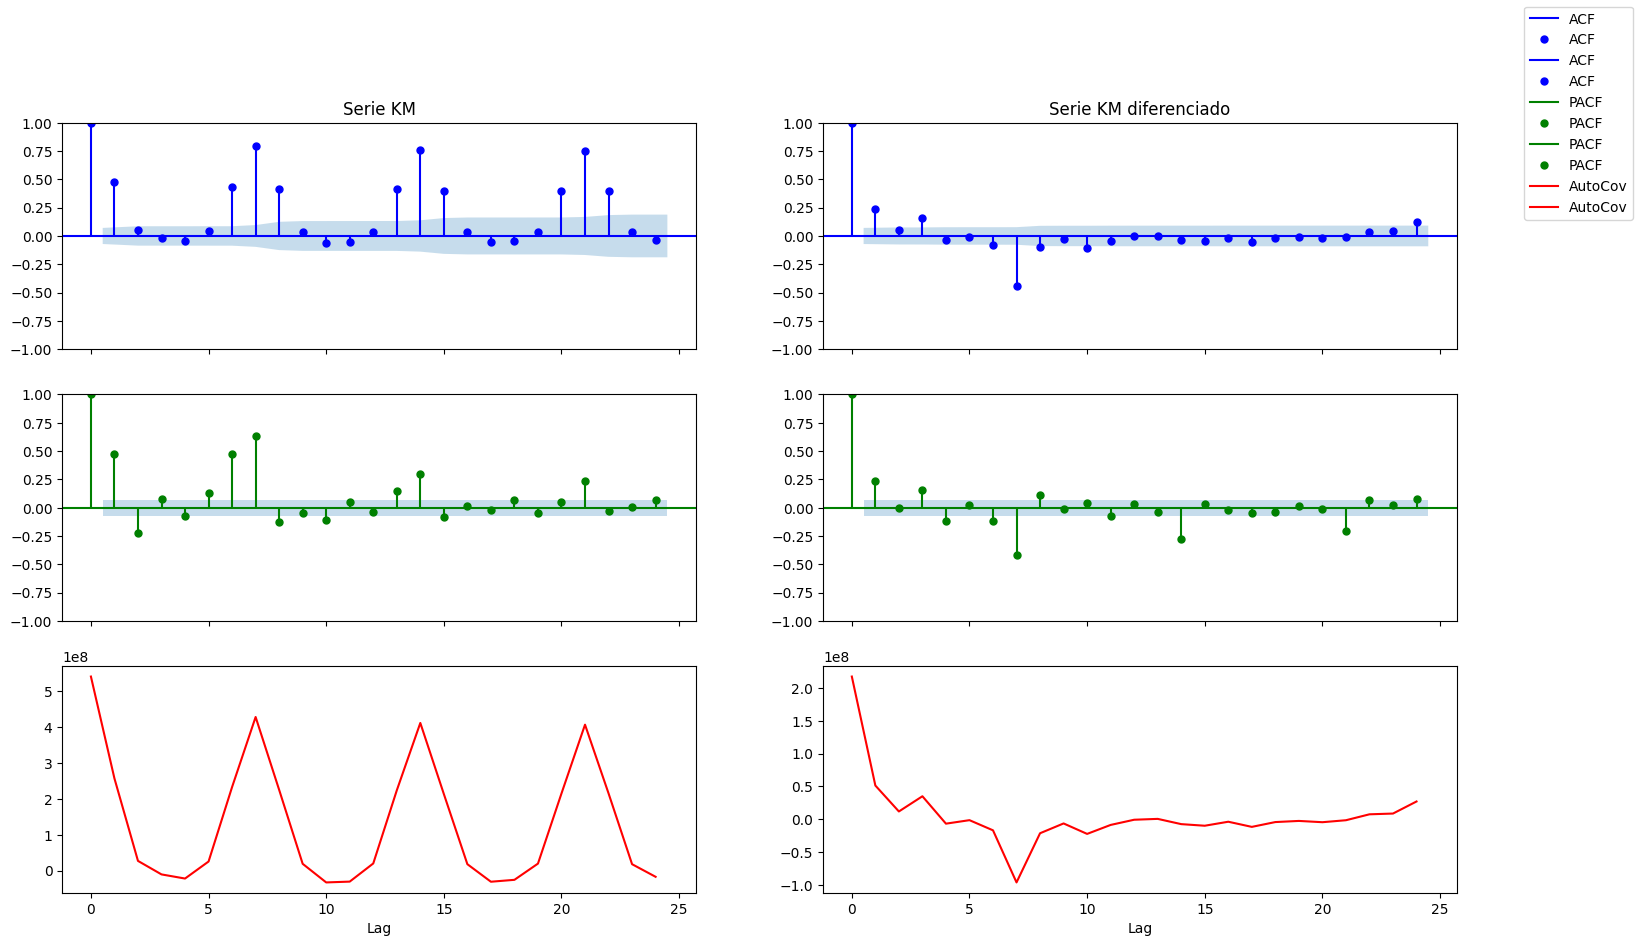

In [219]:
autocov_autocorr(df_km.KM, km_diff_7.KM, nrol= 24 )

# Pregunta 4

Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias.

In [220]:
from statsmodels.tsa.stattools import adfuller

In [221]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [223]:
# Aplicamos Dicky Fuller aumentado a la serie origina
Augmented_Dickey_Fuller_Test_func(df_km.KM,'KM')

Results of Dickey-Fuller Test for column: KM
Test Statistic                  -1.585677
p-value                          0.490784
No Lags Used                    20.000000
Number of Observations Used    740.000000
Critical Value (1%)             -3.439218
Critical Value (5%)             -2.865454
Critical Value (10%)            -2.568854
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [224]:
# Dicky Fuller aumentado de la Serie diferenciada
Augmented_Dickey_Fuller_Test_func(km_diff_7.KM ,'KM')

Results of Dickey-Fuller Test for column: KM
Test Statistic                -9.801399e+00
p-value                        5.981769e-17
No Lags Used                   2.000000e+01
Number of Observations Used    7.330000e+02
Critical Value (1%)           -3.439303e+00
Critical Value (5%)           -2.865491e+00
Critical Value (10%)          -2.568874e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


## Punto 5

Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual global de los parámetros del modelo).

In [234]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest

In [235]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [236]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

In [238]:
estacionario(df_km.KM)

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [239]:
print_test_afd(df_km.KM)

Estadistico ADF: -1.585677
p-valor: 0.490784
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


### SARIMA

In [240]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [249]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = df_km.KM.iloc[:round(len(df_km)*.80)]

# Seleccionamos el 20% restante para test
test = df_km.KM.iloc[round(len(df_km)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train)
print(test)


Fecha
2021-10-01     73177.190
2021-10-02     49300.256
2021-10-03     34024.972
2021-10-04     73453.515
2021-10-05     73722.635
                 ...    
2023-05-28     46429.980
2023-05-29    102266.295
2023-05-30    103408.078
2023-05-31    103403.519
2023-06-01    104291.072
Freq: D, Name: KM, Length: 609, dtype: float64
Fecha
2023-06-02    103121.540
2023-06-03     62877.695
2023-06-04     46983.239
2023-06-05    103512.439
2023-06-06    103902.764
                 ...    
2023-10-27    102590.551
2023-10-28     62622.827
2023-10-29     44060.420
2023-10-30    101843.308
2023-10-31    102381.640
Freq: D, Name: KM, Length: 152, dtype: float64


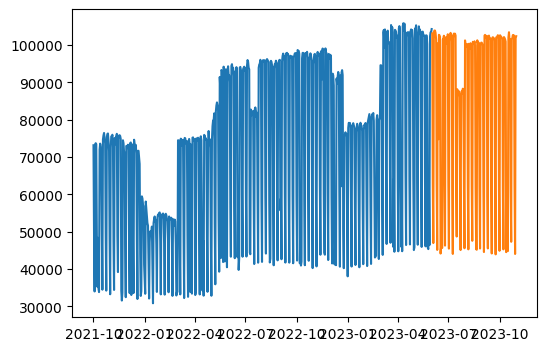

In [250]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

Utilizando los análisis realizados sobre la serie se realizarán los siguientes ajustes sobre los parámetros del AutoArima:

Se setea el parámetro m = 7, ya que la serie tiene valores diarios con una estacionalidad por semana como se vio en las gráficas anteriores.

Se realiza 1 diferenciación en el período estacional, por lo que se setea el parámetro D = 1.

Como no hay que realizar una diferenciación fuera del período estacional el parámetro d se setea igual a 0, d = 0.

Se consultó la siguiente documentación:

https://alkaline-ml.com/pmdarima/tips_and_tricks.html

https://people.duke.edu/~rnau/seasarim.htm#outline

In [251]:
from pmdarima.arima import auto_arima, ndiffs, nsdiffs

In [253]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

# Realizar la búsqueda de cuadrícula de hiperparámetros
auto_arima(train, start_p=0, max_p=7, start_d=1, max_d=7, start_q=0, max_q=7,
           start_P=0, max_P=7, start_D=0, max_D=7, start_Q=0, max_Q=7,
           seasonal=True, m=7, trace=True, stepwise=True,
          information_criterion='bic', alpha=0.05).summary()

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : BIC=13950.928, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : BIC=13641.010, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : BIC=13568.048, Time=3.85 sec
 ARIMA(0,1,0)(0,0,0)[7]             : BIC=13944.522, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : BIC=13814.974, Time=0.92 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : BIC=inf, Time=4.83 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : BIC=13574.443, Time=5.44 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : BIC=inf, Time=1.99 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : BIC=inf, Time=7.08 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : BIC=13782.619, Time=0.36 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : BIC=13605.974, Time=3.62 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : BIC=13518.391, Time=1.24 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : BIC=13691.778, Time=1.16 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : BIC=13293.911, Time=4.50 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  609
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -6627.725
Date:                             Wed, 06 Dec 2023   AIC                          13267.450
Time:                                     00:49:20   BIC                          13293.911
Sample:                                 10-01-2021   HQIC                         13277.745
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.3537     14.207      0.518      0.605     -20.492      35.199
ma.L1         -0.6545      0.067     -9.759      0.000      -0.786      -0.523
ma.L2         -0.2728      0.081     -3.351      0.001      -0.432      -0.113
ar.S.L7        0.9793      0.022     44.014      0.000       0.936       1.023
ma.S.L7       -0.8052      0.086     -9.397      0.000      -0.973      -0.637
sigma2      2.956e+08    2.7e-06   1.09e+14      0.000    2.96e+08    2.96e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1411.42
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -1.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+29. Standard errors may be unstable.
"""

In [254]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [255]:
modelo_sarima = SARIMAX(train, order=(0,1,2), seasonal_order=(1,0,1,7))
modelo_sarima = modelo_sarima.fit()
print(modelo_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  KM   No. Observations:                  609
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -6551.877
Date:                             Wed, 06 Dec 2023   AIC                          13113.753
Time:                                     00:53:07   BIC                          13135.804
Sample:                                 10-01-2021   HQIC                         13122.332
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6135      0.029    -21.480      0.000      -0.669      -0.558
ma.L2         -0.2892      

In [266]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="KM"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [257]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [258]:
print(f"Los parametros que arroja el modelo son= \n {modelo_sarima.params} ")

Los parametros que arroja el modelo son= 
 ma.L1     -6.134794e-01
ma.L2     -2.892143e-01
ar.S.L7    9.999950e-01
ma.S.L7   -9.968856e-01
sigma2     1.290518e+08
dtype: float64 


In [259]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {modelo_sarima.aic} \n -Bayesiano= {modelo_sarima.bic} \n -Hannan-Quinn {modelo_sarima.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 13113.75330962075 
 -Bayesiano= 13135.804184030581 
 -Hannan-Quinn 13122.332175153135


In [260]:
print(f" La media de los residuos del modelo es=  {modelo_sarima.resid.mean()}")

 La media de los residuos del modelo es=  13.722811745204865


In [261]:
print(f" La varianza de los residuos del modelo es=  {modelo_sarima.resid.var()}")

 La varianza de los residuos del modelo es=  144807033.1408437


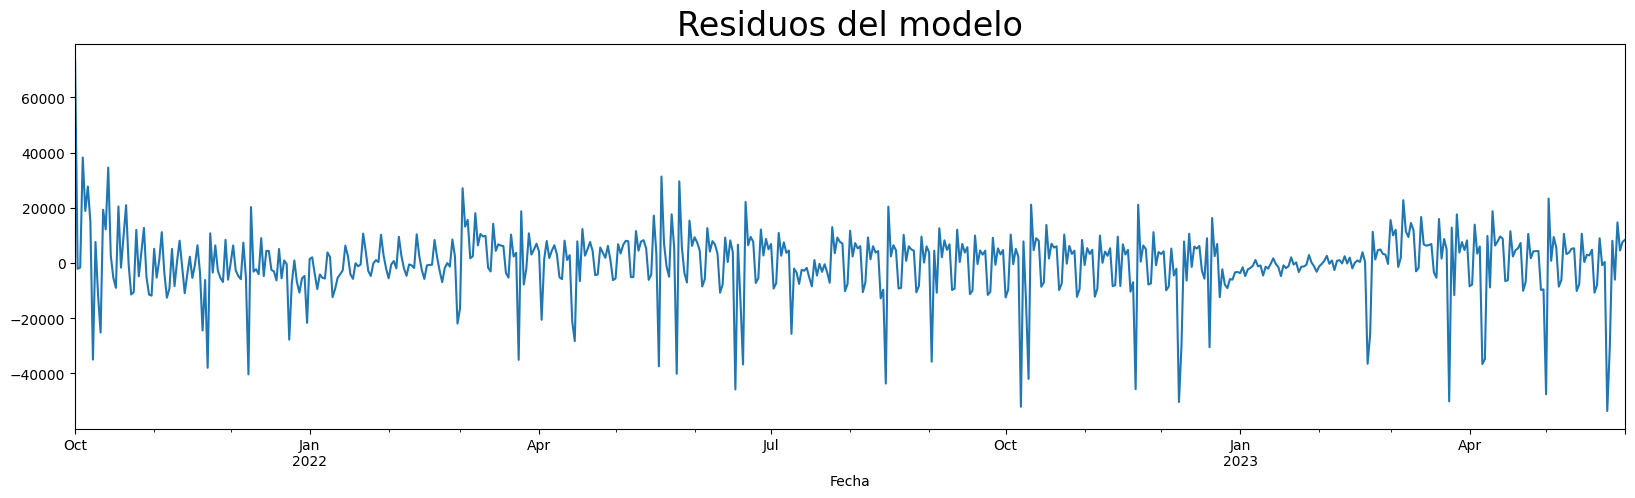

In [262]:
modelo_sarima.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

In [263]:
modelo_sarima.resid.head(10)

Fecha
2021-10-01    73177.190000
2021-10-02    -2080.287029
2021-10-03    -1635.238043
2021-10-04    38225.939156
2021-10-05    18862.846764
2021-10-06    27698.181163
2021-10-07    14831.962082
2021-10-08   -34981.477368
2021-10-09     7645.745869
2021-10-10   -11454.907354
Freq: D, dtype: float64

### Predicciones SARIMA

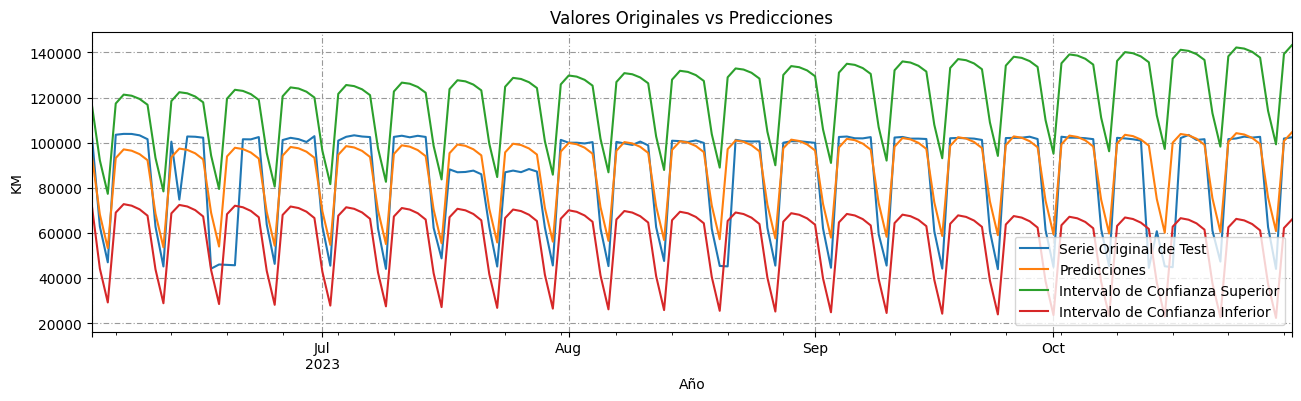

In [267]:
predicciones_sarima = modelo_sarima.get_forecast(len(test))


# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test, predicciones_sarima.predicted_mean, predicciones_sarima.conf_int())

## Conclusión

In [268]:
datos = {'Modelos': ['SARIMA','ARIMA'],
         'AIC': [modelo_sarima.aic, modelo_arima.aic],
         'BIC': [modelo_sarima.bic, modelo_arima.bic],
         'MAE': [modelo_sarima.mae, modelo_arima.mae],
         'MSE': [modelo_sarima.mse, modelo_arima.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

NameError: name 'modelo_arima' is not defined